In [16]:
# functions

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
def mandel(c, z=0, max_iter=100):
    for k in range(max_iter):
        z = z*z + c
        if abs(z) > 2:
            return k
    return k

In [22]:
def mandelbrot(w, h, xl=-1.5, xu=0.5, yl=-1, yu=1):
    img = np.zeros((h, w)).astype('int')
    for i, real in enumerate(np.linspace(xl, xu, w)):
        for j, imag in enumerate(np.linspace(yl, yu, h)):
            c = complex(real, imag)
            img[j, i] = mandel(c)
    return img

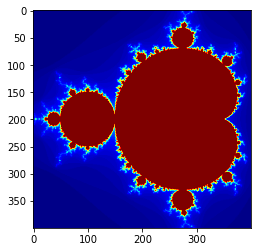

In [24]:
img = mandelbrot(w=400,h=400)
plt.grid(False)
plt.imshow(img,cmap=plt.cm.jet)
pass

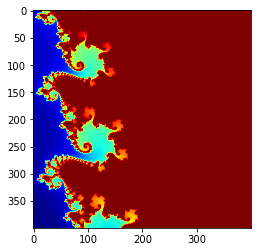

In [26]:
# Function is re-usable¶
img = mandelbrot(w=400, h=400, xl=-0.75, xu=-0.73, yl=0.1, yu=0.12)
plt.grid(False)
plt.imshow(img, cmap=plt.cm.jet)
pass

#### Anonymous functions (lambdas) ####

以这样认为,lambda作为一个表达式，定义了一个匿名函数,非常容易理解，在这里lambda简化了函数定义的书写形式。是代码更为简洁，但是使用函数的定义方式更为直观，易理解。
Python中，也有几个定义好的全局函数方便使用的，filter, map, reduce　　
总结：lambda 是为了减少单行函数的定义而存在的。

In [28]:
def square(x):
    return x**2

In [30]:
square(3)

9

In [32]:
square2 = lambda x: x**2

In [34]:
square2(3)

9

First class functions
functions can be treated the same way as (say) an integer

In [36]:
def grad(x,f,h=0.01):
    return ((f(x+h) - f(x-h)))/(2*h)
def f(x):
    return 3*x**2 + 5*x +3

In [38]:
grad(0,f)

5.000000000000004

Functions can also be returned by functions

In [40]:
import time
def timer(f):
    def g(*args,**kwargs):
        start = time.time()
        result = f(*args,**kwargs)
        elapsed = time.time() -start
        return result, elapsed
    return g

In [42]:
def f(n = 100000000):
        s = sum([x*x for x in range(n)])
        return s
timed_func = timer(f)

In [44]:
timed_func()

(333333328333333350000000, 8.936018943786621)

Decorators¶

In [46]:
@timer
def g(n=10000000):
    s = sum([x*x for x in range(n)])
    return s

In [48]:
g()

(333333283333335000000, 0.7552099227905273)

#### Map, filter, reduce

In [50]:
map(lambda x: x**2,[1,2,3,4])

In [52]:
list(map(lambda x: x**2,[1,2,3,4]))

[1, 4, 9, 16]

In [54]:
list(filter(lambda x: x%2==0,[1,2,3,4]))

[2, 4]

有点儿意思，这个功能还有待开发

In [56]:
from functools import reduce
reduce(lambda x, y : x*y,[1,2,3,4],10)

240

List comprehension¶

In [58]:
[x*x for x in [1,2,3,4]]
# 为啥外面非要这样写

[1, 4, 9, 16]

In [59]:
[x for x in [1,2,3,4] if x%2 ==0]

[2, 4]

Set and dictionary comprehension¶

In [60]:
[i%3 for i in range(10)]

[0, 1, 2, 0, 1, 2, 0, 1, 2, 0]

In [61]:
{i: i%3 for i in range(10)}

{0: 0, 1: 1, 2: 2, 3: 0, 4: 1, 5: 2, 6: 0, 7: 1, 8: 2, 9: 0}

In [62]:
# Generator expressions
(i**2 for i in range(10))

<generator object <genexpr> at 0x7fdef033f510>

In [63]:
for x in (i**2 for i in range(10,15)):
    print(x)

100
121
144
169
196


In [64]:
# Generator expressions

# Generator expressions return a potentially infinite stream, but one at a time thus sparing memory. They are ubiquitous in Python 3, allowing us to handle arbitrarily large data sets.



In [65]:
# Note that count can generate an infinite stream
def count (i = 0):
    while True:
        yield i
        i += 1

In [66]:
c = count()
next(c)

0

In [67]:
next(c)
next(c)
next(c)

3

In [68]:
list(zip('abcde',count(10)))

[('a', 10), ('b', 11), ('c', 12), ('d', 13), ('e', 14)]

In [69]:
for i in count():
    print(i)
    if i >= 10:
        break

0
1
2
3
4
5
6
7
8
9
10


In [70]:
def palindrome_numbers(n):
    yield from range(1, n+1)
    yield from range(n, 0, -1)

In [74]:
list(palindrome_numbers(5))

[1, 2, 3, 4, 5, 5, 4, 3, 2, 1]

In [76]:
import itertools as it
for i in it.islice(count(),5,10):
    print(i)

5
6
7
8
9


In [79]:
for i in it.takewhile(lambda i:i<5,count()):
    print(i)

0
1
2
3
4


In [80]:
import operator as op

[i for i in it.starmap(op.add,[(1,2),(2,3),(3,4)])]

[3, 5, 7]

In [81]:
fruits = ['appple', 'banana', 'cherry', 'durain', 'eggplant',  'fig']

for k, group in it.groupby(sorted(fruits,key = len),len):
    print(k,list(group))

3 ['fig']
6 ['appple', 'banana', 'cherry', 'durain']
8 ['eggplant']


Functools¶

In [82]:
import functools as fn

In [83]:
rng1 = fn.partial(np.random.normal,2,.3)
rng2 =fn.partial(np.random.normal,10,1)

In [85]:
rng1(10)
rng1(5)

array([2.38509911, 1.99599029, 2.02708613, 1.83502413, 1.64257582])

In [86]:
rng2(10)

array([10.91553354, 11.28279929,  9.7140785 , 10.73512382,  9.99037801,
       10.68739908, 11.3957725 ,  9.16268216,  9.54871133, 10.36284038])

In [87]:
fn.reduce(op.add,rng2(10))

100.72914007077587

Modules

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
import scipy.stats as ss


In [97]:
DataFrame(ss.beta(2,5).rvs((3,4)), columns=['a', 'b', 'c', 'd'])

,a,b,c,d
0,0.408061,0.615610,0.131179,0.594040
1,0.140579,0.464165,0.299496,0.182576
2,0.671402,0.055133,0.183662,0.144929


In [99]:
import sys
sys.path

homebrew/Caskroom/miniconda/base/envs/jnb/lib/python3.8/site-packages',
 '/opt/homebrew/Caskroom/miniconda/base/envs/jnb/lib/python3.8/site-packages/IPython/extensions',
 '/Users/sagawithme/.ipython']

Creating your own module

In [101]:
%%file my_moudle.py
PI = 3.14

def my_f(x):
        return PI*x

Writing my_moudle.py


In [102]:
import my_moudle as mm

mm.PI

3.14

In [103]:
mm.my_f(2)

6.28

In [104]:
from my_moudle import PI

In [105]:
PI * 2 * 2

12.56

Note: Modules can also be nested within each other - e.g. numpy.random to creaate a package. We will explore how to create packages in a later session.

In [71]:
def greet_me (**kwargs) :
    for key, value in kwargs. items () :
        print("{0} == {1}". format (key, value) )

In [72]:
greet_me (name="yasoob")

name == yasoob
